# Data Science Challenge


In [ ]:
# Libraries
import pandas as pd
pd.set_option("display.max_columns", 101)

- id
- lead_time: Time between booking date and reservation date (in days)
- arrival_week: Week number og the arrival date
- duration: Booking duration (in Days)
- prev_cancel: Number of previous bookings that were cancelled by the customer prior to the current booking
- booking_changes: Number of changes/amendments made to the booking from the moment the booking was entered moment of check-in or cancellation.
- waiting_period: Waiting period for booking confirmation (in Days)
- per Day_price: Per night booking price (in US $).
- parking: Number of car parking spaces required by the customer.
- special_request: Number of special requests made by the customer.
- segment: Market segment designation. In categories, "TA" means "Travel Agents" and TO° means "Tour Operators*
- deposit: Whether the customer made a deposit to guarantee the booking.
- cust_type: Type of booking, assuming one of four categories.
- is_Cancelled: Value indicating if the booking was cancelled (1) or not (0).: 

# Data Wrangling & Visualization

In [ ]:
# The dataset is already loaded below
data = pd.read_csv ("train.csv")

In [ ]:
data.head()

In [ ]:
# Explore columns
data.columns

In [ ]:
# Description
data.describe()

# Visualization, Modeling, Machine Learning
Build a classification model and to determine whether a customer will cancel a booking. Please explain the findings effectively to tecnhnical and non-technical audiences using comments and visualizations, if appropriate.
- Build an optimized model that effectively solves the business problem.
- The models performance will be evalueted on the basis of accuracy.
- Read the test.csv file and prepare features for testing.

In [ ]:
#Loading_Test_ data 
test_data=pd.read_csv('test.csy')
test_data.head()

Describe the the most important features of the model to management.
• Visualize the top 10 features and their feature importance.

# O que fizemos


In [ ]:
import sys
!{sys.executable}-m pip install category_encoders

In [ ]:
# Libraries
import pandas as pd
pd.set_option("display.max_columns", 101) 
from sklean.model_selection import train_test_split 
from skleaco.ensemble import RandomForestClassifiec 
from skleaco.metrics import accuracy_score 
from category_encoders import OrdinalEncoder

Vizualization, Modeling, machine learning

In [ ]:
#Check missing values 
data.isnull().sum()

# No missing values

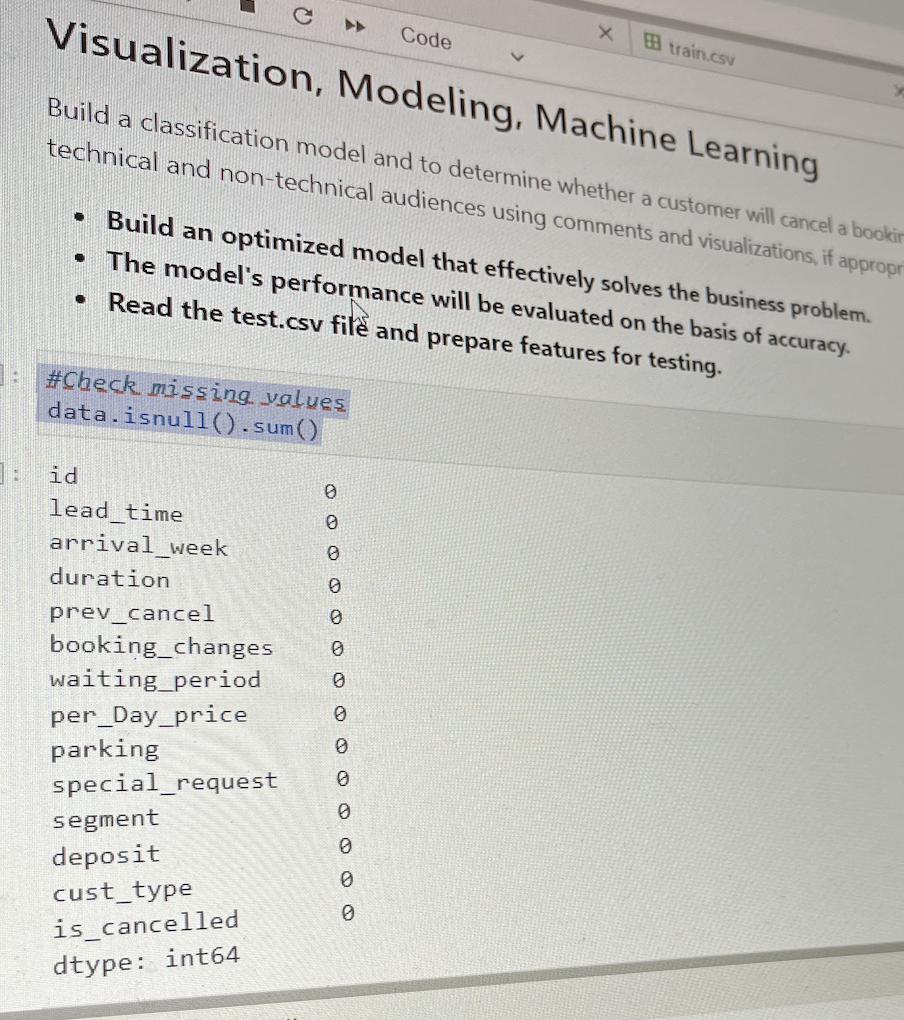

In [ ]:
#Convent_ categorical_variables.to ordinal_encoders_variables
mapping = [{'col': 'segment', 
            'mapping':{'Aviation' : 1,
                       'Complementary' : 2,
                       'Corporate' : 3,
                       'Direct' : 4,
                       'Groups' : 5,
                       'Offline TA/TO': 6,
                       'nline TA': 7
                       }
            },
            {'col': 'deposit', 
            'mapping':{'No Deposit  ' : 1,
                       'Non refund  ' : 2,
                       'Refundable': 3
                       }
            },{'col': 'cust_type', 
            'mapping':{'Contract' : 1,
                       'Group' : 2,
                       'Transient': 3,
                       'Transient-Party' : 4
                       }
            }
            ]

data = OrdinalEncoder (cols=['segment', 'deposit', 'sust_type'], mappiog = mapping).fit(data).transform(data)

# data = pd.get_dummies (data)

In [ ]:
data.segment.unique()

In [ ]:
# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(data.drop('is_cancelled', axis=1), data['is_cancelled'])

In [ ]:
# Train random forest classifier on the training test
clf = RandomForestClassifier(n_estimators=100, max_depth=10)
clf.fit(X_train, y_train)

In [ ]:
# Make prediction on the testing set
y_pred = clf.predict(X_test)


In [ ]:
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Describe the most important featues of the model to management

In [ ]:
importances = clf.feature_importances_
for feature, importance in zip(X_train.columns, importances):
    print(f"' {feature}: {importance}")

items = list(zip(X_train.columns, importances))
my_dict = dict(items)
my_dict

In [ ]:
sorted_dict = dict(sorted(my_dict.items (), key= lambda x: x[1], reverse = True))
#Print Top_10 features
for i, (key, value) in enumerate(sorted_dict.items()) :
    print (f'{key}: {value}')
    if i == 9:
        break